### Task 3

# Iris Flower Classification
### Project by - Lhingnunching Lhungdim

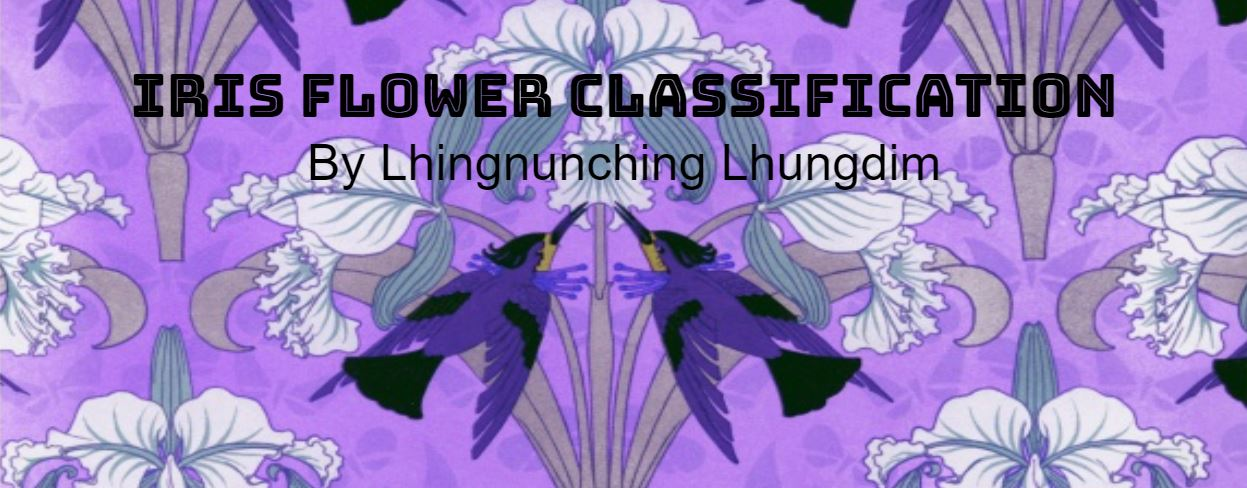
*All images are produced by the author

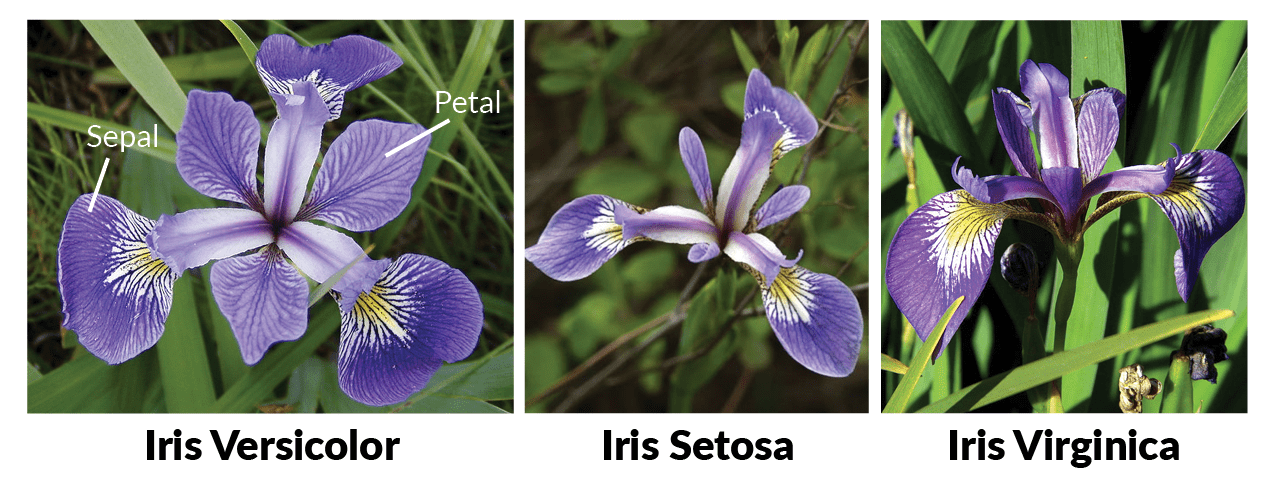

### Introduction

This is the third task of the CodSoft Data Science intership. <br>

The Iris flower dataset is a classic dataset in the field of machine learning. It features three distinct species of Iris flowers: setosa, versicolor, and virginica. These species exhibit variations in their physical measurements, making them distinguishable. In this task, we have access to a collection of Iris flowers, each categorized by its corresponding species. The goal of this project is to harness the power of machine learning to train a model that can learn from these measurements and effectively classify Iris flowers into their correct species. 
<br>

The tasks at hand are as follows:

- The Iris flower dataset consists of three species: setosa, versicolor,and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
- Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.


The dataset was downloaded from Kaggle: https://www.kaggle.com/datasets/arshid/iris-flower-dataset 


### Importing Libraries and Packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

### I. Loading the Dataset

In [2]:
data = pd.read_csv('T3.csv')

### II. Exploratory Data Analysis 

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking the datatype of the attributes

In [4]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

#### Chekcing for Null values

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Describing the data

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Counting the occurrences of each unique Species

In [7]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### III. Analyzing and Visualizing the Data

#### Pairplot for Visualizing the attributes

<Figure size 576x432 with 0 Axes>

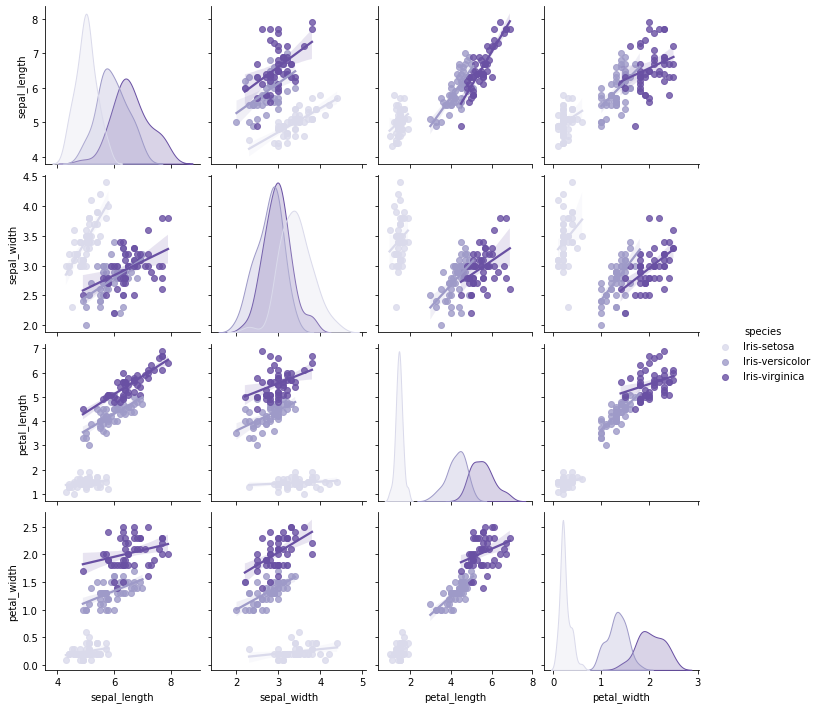

In [8]:
plt.figure(figsize=(8,6));
sns.pairplot(data,kind='reg',hue ='species',palette="Purples" );

#### Histogram of the species-wise measurements of the flowers

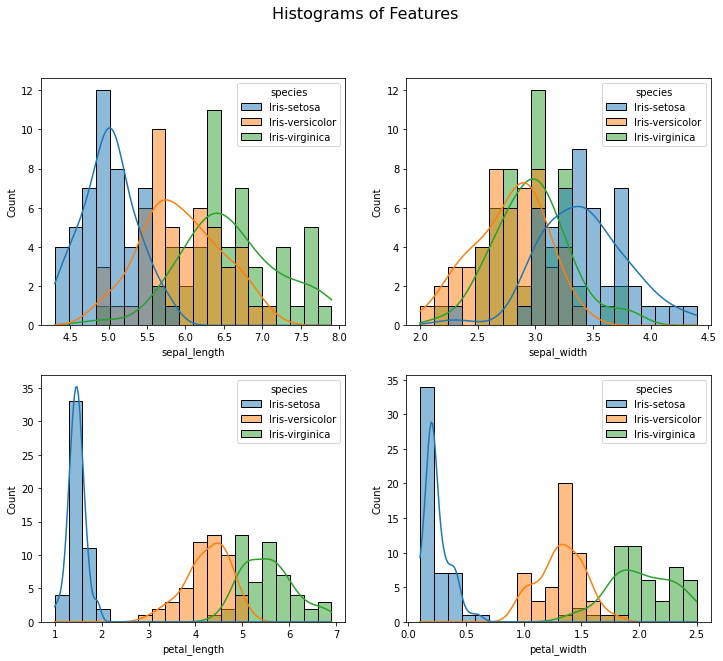

In [20]:
num_columns = list(data.select_dtypes(include=['float']).columns)
num = min(len(num_columns), 2)
fig, ax = plt.subplots(num, num, figsize=(12, 10))
for j in range(num):
    for i in range(num):
        if num_columns:
            sns.histplot(data=data, x=num_columns.pop(0), kde=True, bins=20, hue='species', ax=ax[j][i])
        else:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of Features', fontsize=16)
plt.show()


#### Boxplot of species-wise measurements of the flowers

In [10]:
iris_setosa=data.loc[data["species"]=="Iris-setosa"]
iris_virginica=data.loc[data["species"]=="Iris-virginica"]
iris_versicolor=data.loc[data["species"]=="Iris-versicolor"]

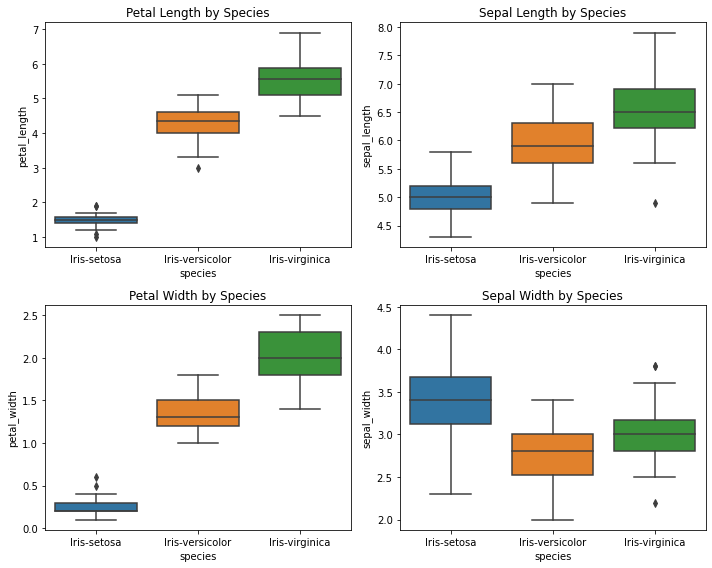

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for petal length
sns.boxplot(x="species", y="petal_length", data=data, ax=axes[0, 0])
axes[0, 0].set_title("Petal Length by Species")

# Boxplot for sepal length
sns.boxplot(x="species", y="sepal_length", data=data, ax=axes[0, 1])
axes[0, 1].set_title("Sepal Length by Species")

# Boxplot for petal width
sns.boxplot(x="species", y="petal_width", data=data, ax=axes[1, 0])
axes[1, 0].set_title("Petal Width by Species")

# Boxplot for sepal width
sns.boxplot(x="species", y="sepal_width", data=data, ax=axes[1, 1])
axes[1, 1].set_title("Sepal Width by Species")

plt.tight_layout()
plt.show()


#### Correlation Heatmap of the measurement attributes

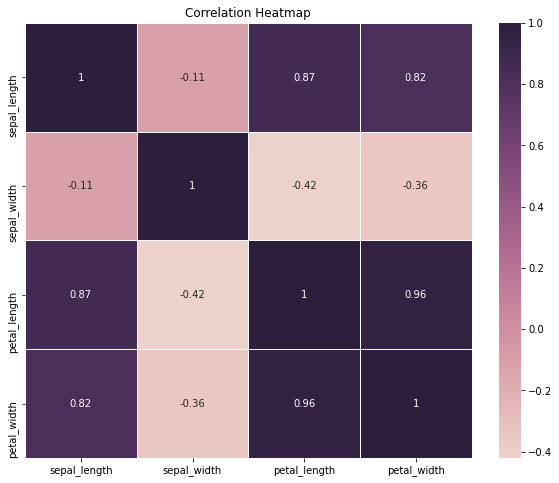

In [12]:
cordata = data.drop(['species'], axis=1)

correlation_matrix = cordata.corr()

plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()


### IV. Predictive Analysis: Classifying Iris Flowers

In [13]:
# Separate the features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 1. KNN Classifier

In [14]:
# Train the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Test the KNN model
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)


In [15]:
# Print accuracy and classification report for KNN
print("K-Nearest Neighbors (KNN) Results:")
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_report)


K-Nearest Neighbors (KNN) Results:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### 2. Logistic Regression Classifier

In [16]:
# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Test the Logistic Regression model
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)

In [17]:
# Print accuracy and classification report for Logistic Regression
print("\nLogistic Regression Results:")
print("Accuracy:", lr_accuracy)
print("Classification Report:\n", lr_report)



Logistic Regression Results:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### V. Results and Interpretation

**K-Nearest Neighbors (KNN):** <br>
- The KNN model showcased good performance on the Iris dataset, achieving an accuracy of 1.0. This indicates that it accurately classified all 30 instances, irrespective of the Iris flower species.  
- The precision, recall, and F1-score for each class (Iris-setosa, Iris-versicolor, and Iris-virginica) were all 1.0, demonstrating the model's capacity to make both precise and comprehensive predictions for each class. 
- The 'support' values aligned well with the model's accuracy, with 10 instances for Iris-setosa, 9 for Iris-versicolor, and 11 for Iris-virginica. 

**Logistic Regression:** <br>
- The Logistic Regression model also achieved an accuracy of 1.0 on the Iris dataset, correctly classifying all 30 instances. 
- Its precision, recall, and F1-score for each class (Iris-setosa, Iris-versicolor, and Iris-virginica) were all 1.0, highlighting the model's ability to provide accurate and complete predictions for all three classes.
- The 'support' values once again affirmed the model's exceptional accuracy, with 10 instances for Iris-setosa, 9 for Iris-versicolor, and 11 for Iris-virginica. 

### VI. Model Testing

What will be the classification of the flower when the measurements are as follows: a sepal length of 5.1, a sepal width of 3.5, a petal length of 1.4, and a petal width of 0.2? 

In [18]:
# Test the models with sample data
sample_data = np.array([[5.1, 3.5, 1.4, 0.2]])  
knn_prediction = knn_model.predict(sample_data)
lr_prediction = lr_model.predict(sample_data)

print("KNN Prediction:", knn_predictions[0])
print("Logistic Regression Prediction:", lr_predictions[0])

KNN Prediction: Iris-versicolor
Logistic Regression Prediction: Iris-versicolor


### VII. Conclusion

The core task of the Iris dataset project was to classify Iris flower species based on their distinct characteristics. This project leveraged data analysis, preprocessing, and feature engineering, along with machine learning classification techniques, to achieve this goal. Various visualizations, including bar plots, hitograms, and correlation heatmaps were employed to gain insights into the dataset and model performance. The project utilized two classification techniques, K-Nearest Neighbors (KNN) and Logistic Regression, both of which delivered impeccable results, with perfect accuracy, precision, and recall. These models exhibited their proficiency in accurately classifying Iris flowers. Notably, the Python packages utilized in this project encompassed numpy, pandas, scikit-learn, seaborn and matplotlib. This comprehensive analysis and classification project underscore the capacity of these techniques and tools in tackling real-world classification tasks.

$Thank You$